In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sbm import SBMGraph
from tracker import Tracker
%matplotlib inline
%config InlineBackend.figure_format='retina'
np.random.seed(0)

In [68]:
confusion_matrix = loadmat('data/P_2_dogs3_drag-and-drop.mat')['P_2']
# confusion_matrix = np.eye(3) * 0.75
n = 473
K = 3
clusters = [list(range(0, 172)),
            list(range(172, 322)),
            list(range(322, 473))]

tracker = Tracker()
graph = SBMGraph(n=n,
                 K=K,
                 p=1,
                 q=0,
                 confusion_matrix=confusion_matrix,
                 clusters=clusters,
                 tracker=tracker)
graph.condition_block_auto(2,
                           9000,
                           use_confusion_matrix=True,
                           computer_vi=True,
                           compute_edge_density=True)

/Users/yichen/miniconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


0.8869682125086029

In [69]:
amt_observed = np.array(
    [[2260, 1974, 2011], [1974, 1860, 1732], [2011, 1732, 1720]], dtype=int
)
amt_P = loadmat("data/P_2_dogs3_drag-and-drop.mat")["P_2"]
amt_P = confusion_matrix

sim_observed = np.zeros((len(clusters), len(clusters)), dtype=int)
for i, cluster_i in enumerate(clusters):
    for j, cluster_j in enumerate(clusters):
        e = graph.explored_matrix[cluster_i][:, cluster_j]
        sim_observed[i, j] = e.sum()
sim_P = tracker.edge_density

In [70]:
sim_P

array([[0.55629139, 0.13427562, 0.10970874],
       [0.13427562, 0.44685714, 0.15270655],
       [0.10970874, 0.15270655, 0.59214831]])

In [71]:
def bounds(n, delta=0.05, dataset='dogs'):
    if dataset == 'dogs3':
        delta_prime = delta / 6
    else:
        delta_prime = delta / 21
    # return np.sqrt(0.5 * n * np.log(2 / delta))
    return np.sqrt(np.log(2 / delta_prime) / (2 * n))

0.03990706413873931
0.04122494004771563
0.04042673431695095
0.04386147639960984
0.043798951098543225
0.04284524246030564


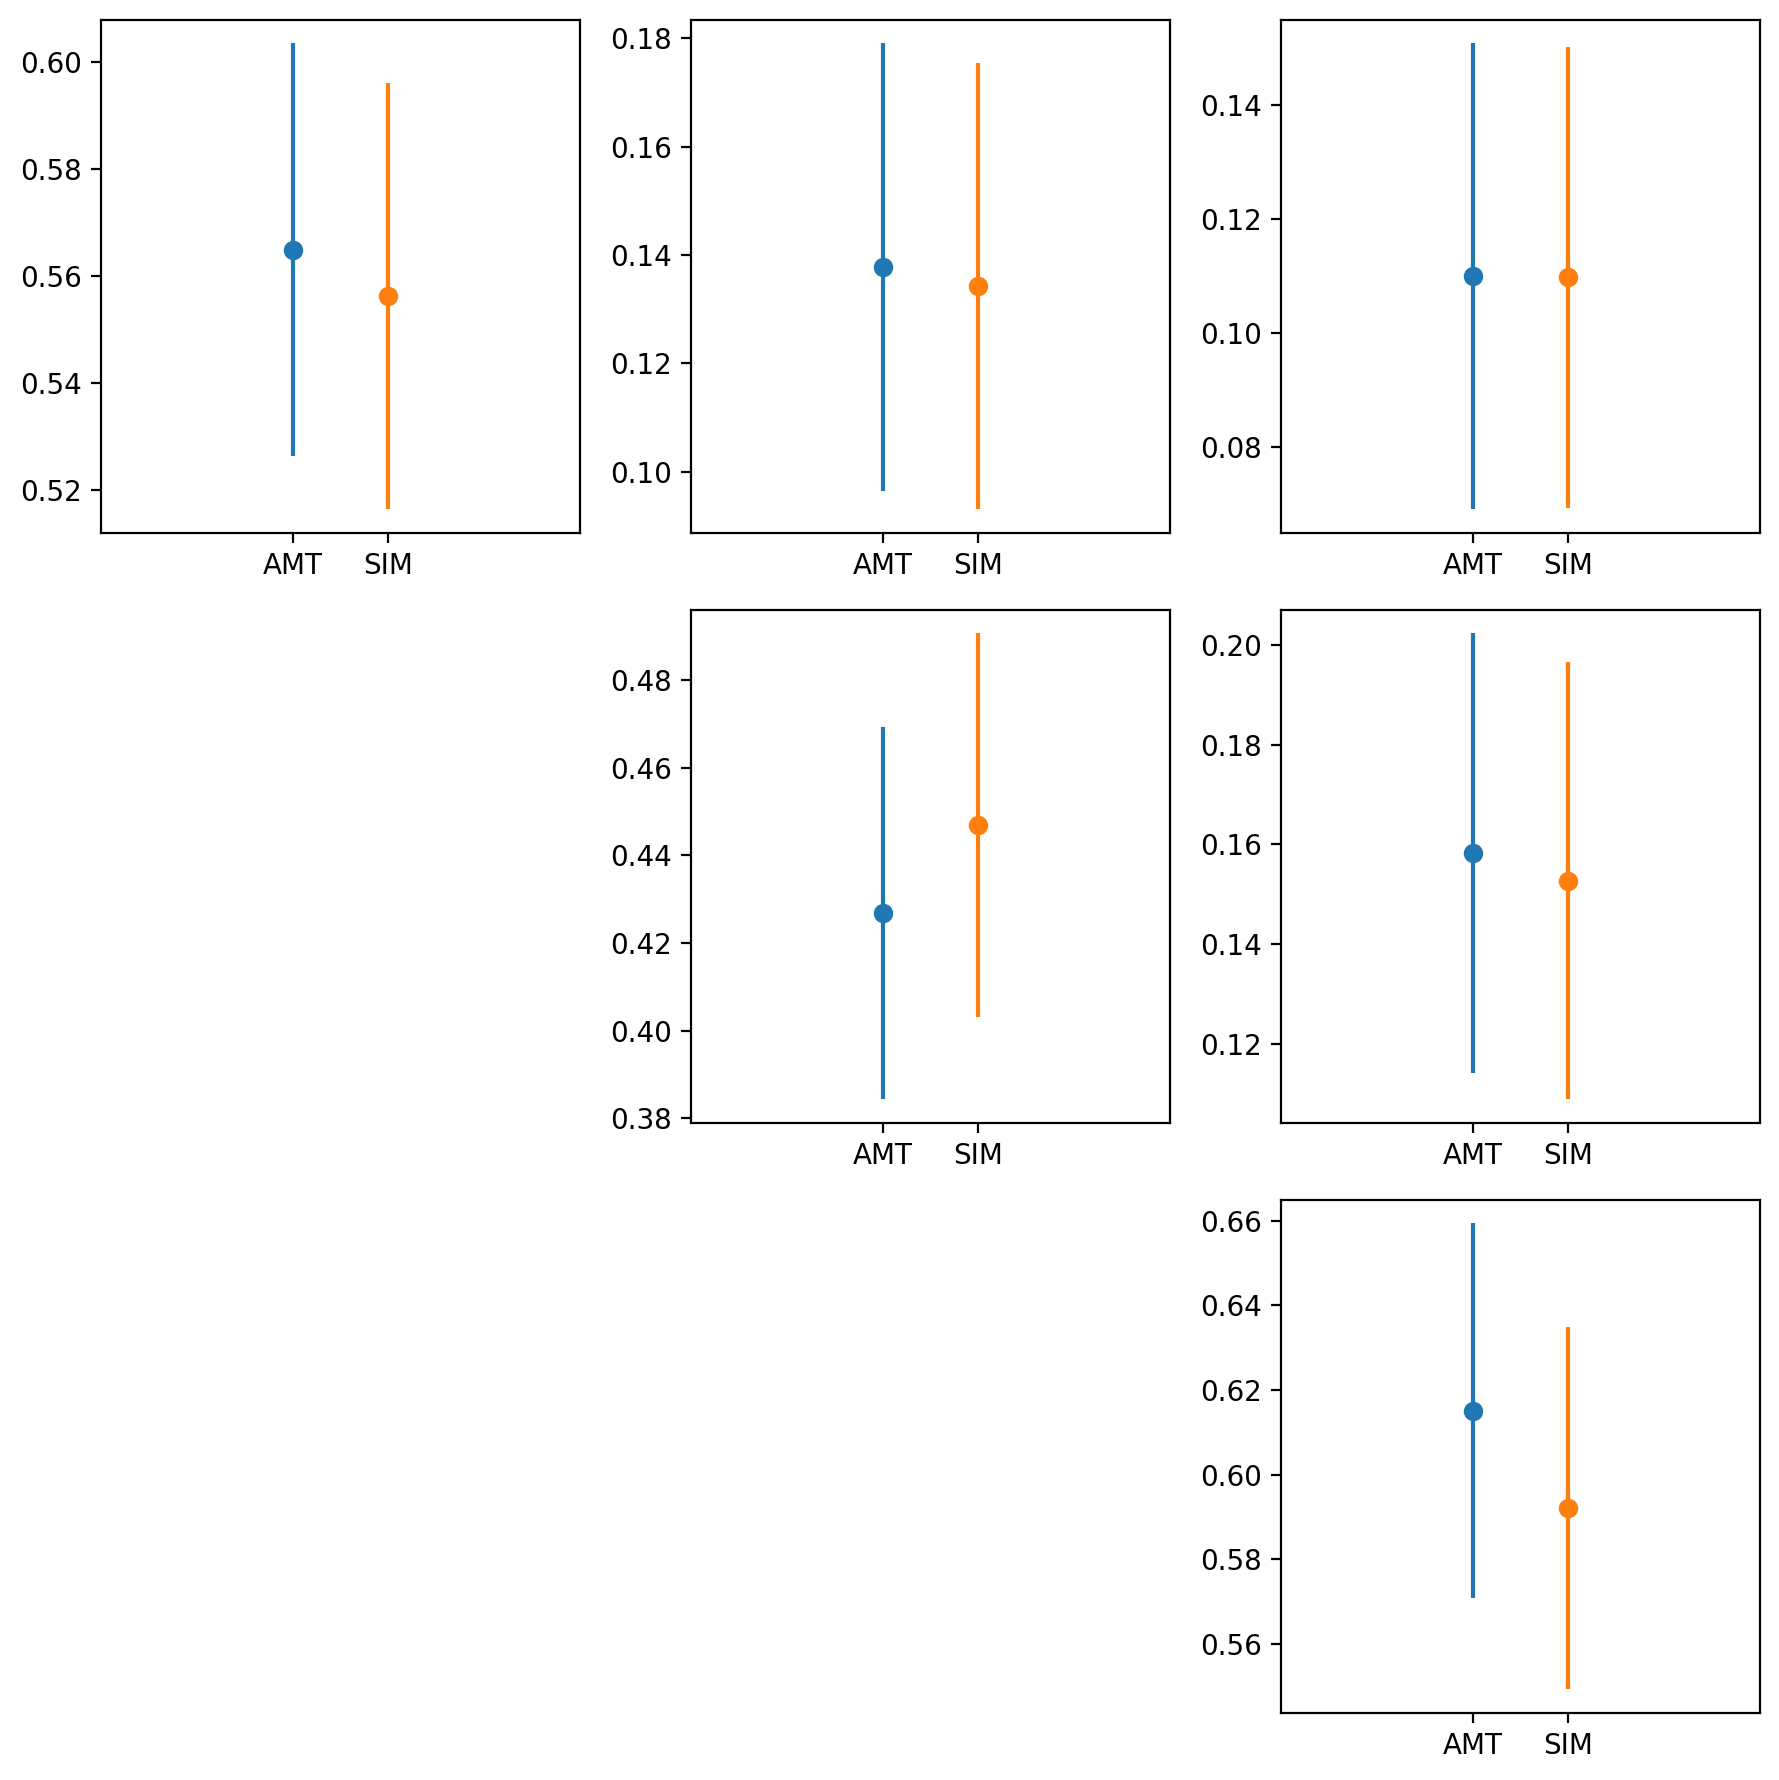

In [72]:
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i in range(len(clusters)):
    for j in range(len(clusters)):
        if i > j:
            # remove axes
            axes[i, j].axis('off')  
            continue

        amt_bound = bounds(amt_observed[i, j])
        sim_bound = bounds(sim_observed[i, j])
        print(sim_bound)
        # plot the confidence intervals for amt and sim
        axes[i, j].errorbar(x=0, y=amt_P[i, j], yerr=amt_bound, fmt='o', label='amt')
        axes[i, j].errorbar(x=1, y=sim_P[i, j], yerr=sim_bound, fmt='o', label='sim')
        axes[i, j].set_xlim([-2, 3])
        axes[i, j].set_xticks([0, 1])
        axes[i, j].set_xticklabels(['AMT', 'SIM'])
fig.tight_layout()